In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os as os

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Load the transition path computed in [TransitionDynamics.ipynb](https://github.com/jlperla/PerlaTonettiWaugh.jl/blob/master/TransitionDynamics.ipynb)

In [3]:
output_location = "data/"
hash_value = "11368798858269829579"
output_location = output_location + hash_value + ".csv"
df = pd.read_csv(output_location) # front-loaded with stationary 
fig_path = "figures/"

The main dataframe is front-loaded with the time-0 stationary solution

In [4]:
df.head(10)

,t,g,z_hat,Ω,E,v_1,L_tilde,entry_residual,λ_ii,S,...,c,π_min,log_M,U,π_rat,L_tilde_a,L_tilde_x,L_tilde_E,w,r
0,-20.00,0.007920,1.988198,0.685242,0.020000,6.866778,0.242265,-1.570299e-12,0.894633,0.165460,...,0.871505,0.258243,-0.158403,12.385290,1.858289,0.113380,0.020842,0.108043,0.786970,0.048258
1,-15.00,0.007920,1.988198,0.685242,0.020000,6.866778,0.242265,-1.570299e-12,0.894633,0.165460,...,0.871505,0.258243,-0.118803,12.385290,1.858289,0.113380,0.020842,0.108043,0.786970,0.048258
2,-10.00,0.007920,1.988198,0.685242,0.020000,6.866778,0.242265,-1.570299e-12,0.894633,0.165460,...,0.871505,0.258243,-0.079202,12.385290,1.858289,0.113380,0.020842,0.108043,0.786970,0.048258
3,-5.00,0.007920,1.988198,0.685242,0.020000,6.866778,0.242265,-1.570299e-12,0.894633,0.165460,...,0.871505,0.258243,-0.039601,12.385290,1.858289,0.113380,0.020842,0.108043,0.786970,0.048258
4,-1.00,0.007920,1.988198,0.685242,0.020000,6.866778,0.242265,-1.570299e-12,0.894633,0.165460,...,0.871505,0.258243,-0.007920,12.385290,1.858289,0.113380,0.020842,0.108043,0.786970,0.048258
5,0.00,0.008983,1.875040,0.685242,0.015864,6.866778,0.230633,0.000000e+00,0.860988,0.170765,...,0.900676,0.252346,0.000000,17.428837,1.891829,0.117015,0.027919,0.085699,0.801016,0.047563
6,0.25,0.008992,1.874884,0.684930,0.015911,6.866778,0.230821,0.000000e+00,0.860960,0.170807,...,0.900280,0.252391,0.002247,17.543673,1.891858,0.116991,0.027918,0.085912,0.800859,0.047582
7,0.50,0.009000,1.874729,0.684619,0.015957,6.866778,0.231007,0.000000e+00,0.860932,0.170850,...,0.899887,0.252437,0.004496,17.658640,1.891887,0.116967,0.027916,0.086124,0.800703,0.047600
8,0.75,0.009009,1.874574,0.684309,0.016003,6.866778,0.231192,0.000000e+00,0.860904,0.170892,...,0.899496,0.252482,0.006747,17.773739,1.891916,0.116943,0.027915,0.086334,0.800548,0.047619
9,1.00,0.009017,1.874419,0.684001,0.016049,6.866778,0.231376,0.000000e+00,0.860876,0.170934,...,0.899108,0.252527,0.009000,17.888968,1.891945,0.116919,0.027914,0.086542,0.800394,0.047638


And here is a view of the final observations.

In [5]:
df.tail(10)

,t,g,z_hat,Ω,E,v_1,L_tilde,entry_residual,λ_ii,S,...,c,π_min,log_M,U,π_rat,L_tilde_a,L_tilde_x,L_tilde_E,w,r
166,74.744,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.740486,55.281591,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
167,74.872,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.741799,55.349467,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
168,74.936,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.742455,55.383408,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
169,74.968,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.742784,55.400380,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
170,74.984,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.742948,55.408866,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
171,74.992,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.743030,55.413109,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
172,74.996,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,-2.857714e-11,0.856816,0.177115,...,0.863798,0.259105,0.743071,55.415230,1.896171,0.115269,0.02818,0.102614,0.783941,0.050605
173,74.998,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.743091,55.416291,1.896171,0.115268,0.02818,0.102614,0.783941,0.050594
174,74.999,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,0.000000e+00,0.856816,0.177114,...,0.863798,0.259105,0.743102,55.416822,1.896171,0.115269,0.02818,0.102614,0.783941,0.050597
175,75.000,0.010256,1.852306,0.650814,0.02,6.866778,0.246063,6.668088e-11,0.856816,0.177114,...,0.863798,0.259105,0.743112,55.417352,1.896171,0.115269,0.02818,0.102614,0.783941,0.050594


## Plots 

### Log Level of Consumption

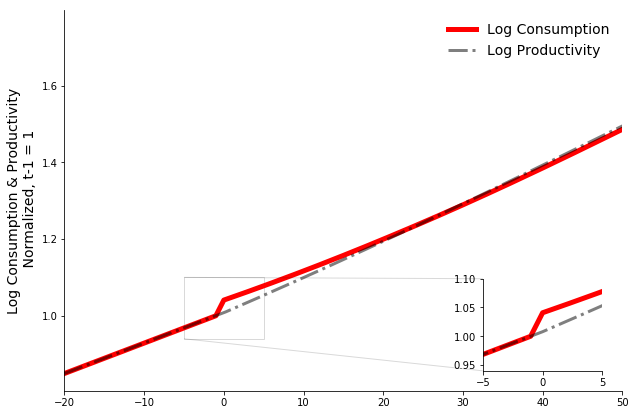

In [6]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, (np.log(df.c) + df.log_M) - (np.log(df.c) + df.log_M).iloc[4] +1, color = "red", lw = 5,
       label = "Log Consumption")

ax.plot(df.t, (df.log_M) - (df.log_M).iloc[4] + 1, color = "k", ls = "-.", alpha = 0.5, lw = 3,
       label = "Log Productivity")
        
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Log Consumption & Productivity\n Normalized, t-1 = 1", fontsize = 14) 

#ax.set_ylim(1-0.06,1+0.25)
ax.set_xlim(-20,50)

ax.legend(fontsize = 14, frameon = False)

axins = zoomed_inset_axes(ax, # The original ax
                          1.5, # zoom level
                          loc=4, # location
                          borderpad=2)  # space around it relative to figure

axins.plot(df.t, (np.log(df.c) + df.log_M) - (np.log(df.c) + df.log_M).iloc[4] +1, color = "red", lw = 5,
       label = "Log Consumption")

axins.plot(df.t, (df.log_M) - (df.log_M).iloc[4]+1, color = "k", ls = "-.", alpha = 0.5, lw = 3,
       label = "Log Productivity")
        
axins.set_xlim(-5,5)
axins.set_ylim(1-0.06,1+0.10)

mark_inset(ax, axins, loc1=3, loc2=2, alpha = 0.15)

axins.spines["top"].set_visible(False)
axins.spines["right"].set_visible(False)

plt.savefig(fig_path + "log_consumption_inset.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Consumption normalized

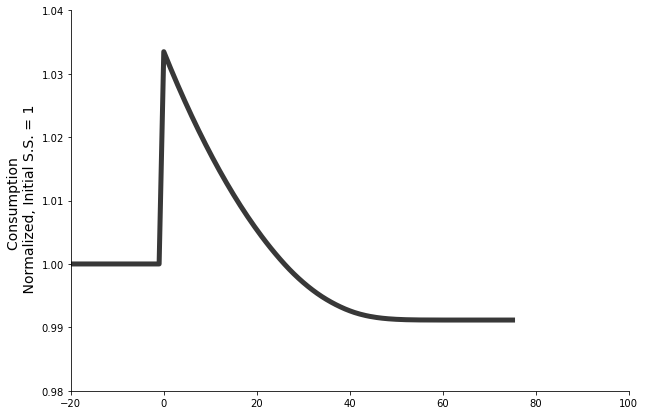

In [7]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, df.c/df.c.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "-", alpha = 0.78)
        
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Consumption \n Normalized, Initial S.S. = 1", fontsize = 14) 

ax.set_ylim(0.98,1.04)

ax.set_xlim(-20,100)

plt.savefig(fig_path + "consumption.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [8]:
print("Normalized Consumption Prior to Change in d (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[0],4))
print("")
print("Normalized Consumption After Change in d (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[5],4))
print("")
print("Normalized Consumption At New SS (Relative to Initial SS)")
print(round((df.c/df.c.iloc[0]).iloc[-1],4))

Normalized Consumption Prior to Change in d (Relative to Initial SS)
1.0

Normalized Consumption After Change in d (Relative to Initial SS)
1.0335

Normalized Consumption At New SS (Relative to Initial SS)
0.9912


### Real Interest Rate

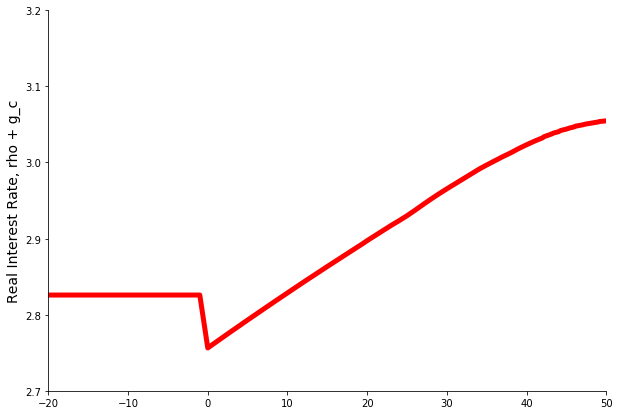

In [9]:
fig, ax = plt.subplots(figsize = (10,7))


ax.plot(df.t, 100*(df.r - 0.02), color = "red", lw = 5, ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Real Interest Rate, rho + g_c", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(2.7,3.2)

plt.savefig(fig_path + "discount_factor.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Productivity Growth

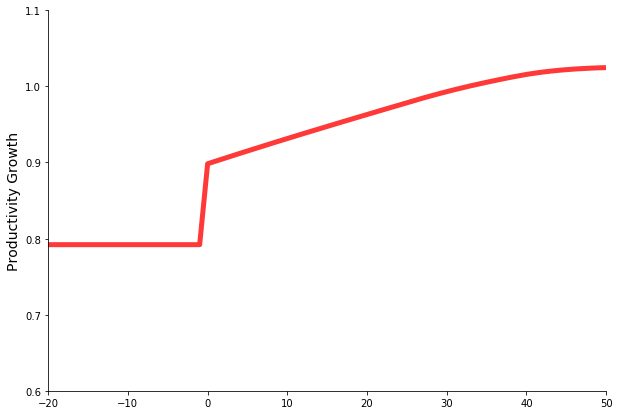

In [10]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, 100*(df.g), color = "red", lw = 5,
        label = "Growth Rate", ls = "-", alpha = 0.78)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Productivity Growth", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(0.6,1.10)

plt.savefig(fig_path + "growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [11]:
print("Productivity Growth atInitial SS")
print(round(df.g.iloc[0],5))
print("")
print("Productivity Growth at Change in d")
print(round(df.g.iloc[5],5))
print("")
print("Productivity Growth at New SS")
print(round(df.g.iloc[-1],5))

Productivity Growth atInitial SS
0.00792

Productivity Growth at Change in d
0.00898

Productivity Growth at New SS
0.01026



### Volume of Trade 



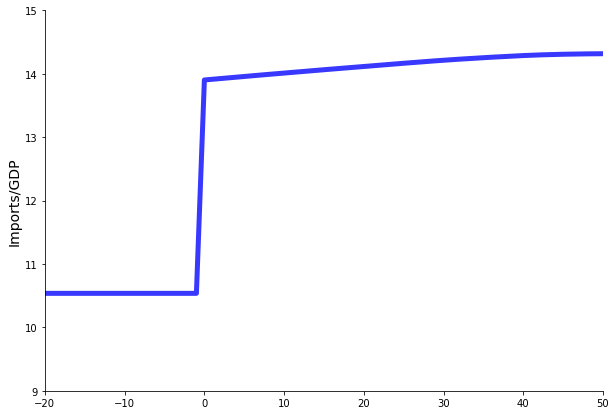

In [12]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, 100*(1-df.λ_ii), color = "blue", lw = 5,
        label = "Growth Rate", ls = "-", alpha = 0.78)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Imports/GDP", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(9,15)

plt.savefig(fig_path + "trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [13]:
print("Imports/GDP at Initial SS")
print(round(100*(1-df.λ_ii).iloc[0],5))
print("")
print("Imports/GDP at Change in d")
print(round(100*(1-df.λ_ii).iloc[5],5))
print("")
print("Imports/GDP at New SS")
print(round(100*(1-df.λ_ii).iloc[-1],5))

Imports/GDP at Initial SS
10.53668

Imports/GDP at Change in d
13.90122

Imports/GDP at New SS
14.31838


### Domestic Variety 

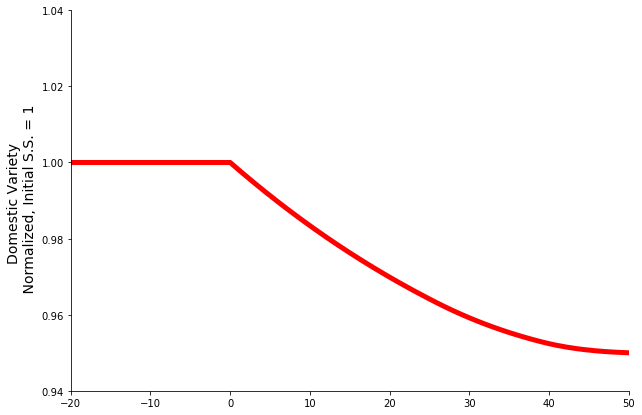

In [14]:
fig, ax = plt.subplots(figsize = (10,7))

before = df.t <= 0
after = df.t >= 0

ax.plot(df.t, df.Ω/df.Ω.iloc[0], color = "red", lw = 5,
        label = "", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Domestic Variety \n Normalized, Initial S.S. = 1", fontsize = 14) 

ax.set_ylim(0.94,1.04)

ax.set_xlim(-20,50)

plt.savefig(fig_path + "omega.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [15]:
print("Normalized Variety Prior to Change in d (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[0],4))
print("")
print("Normalized Variety 1+ Period After Change in d (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[6],4))
print("")
print("Normalized Variety At New SS (Relative to Initial SS)")
print(round((df.Ω/df.Ω.iloc[0]).iloc[-1],4))

Normalized Variety Prior to Change in d (Relative to Initial SS)
1.0

Normalized Variety 1+ Period After Change in d (Relative to Initial SS)
0.9995

Normalized Variety At New SS (Relative to Initial SS)
0.9498


## Reallocation Effects

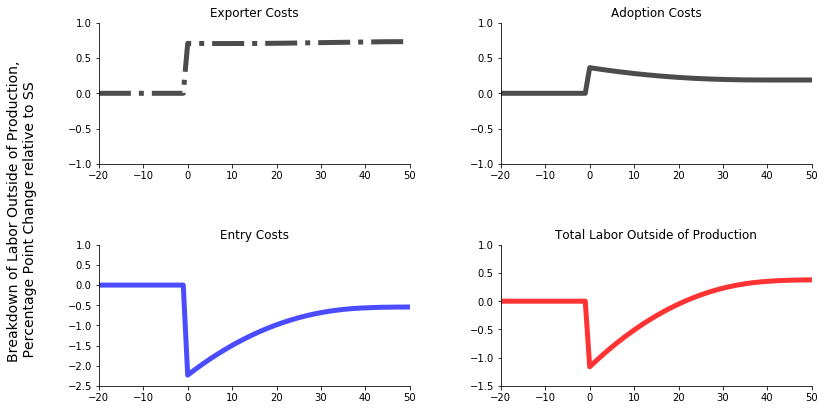

In [16]:
fig, ax = plt.subplots(2,2,figsize = (12,7))

fig.tight_layout(pad = 6)

fig.text(-0.01, 0.5, "Breakdown of Labor Outside of Production,\n Percentage Point Change relative to SS"
         , va='center', rotation='vertical',fontsize = 14)

############################################################################################################
postion = (0,0)

ax[postion].plot(df.t, 100*((df.L_tilde_x) - (df.L_tilde_x.iloc[0])), color = "black", 
           lw = 5, ls = "-.", alpha = 0.70, label = "Exporting Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.0,1.0)

ax[postion].set_title("Exporter Costs")

############################################################################################################

postion = (0,1)

ax[postion].plot(df.t, 100*((df.L_tilde_a) - (df.L_tilde_a.iloc[0])), color = "black",
           lw = 5, ls = "-", alpha = 0.70, label = "Adoption Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.0,1.0)
ax[postion].set_title("Adoption Costs")

############################################################################################################

postion = (1,0)

ax[postion].plot(df.t, 100*(df.L_tilde_E - df.L_tilde_E.iloc[0]) , color = "blue", 
           lw = 5, ls = "-", alpha = 0.70, label = "Entry Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-2.5,1.0)

ax[postion].set_title("Entry Costs")

############################################################################################################

postion = (1,1)

ax[postion].plot(df.t, 100*(df.L_tilde - df.L_tilde.iloc[0])
           , color = "red", lw = 5, ls = "-", alpha = 0.80, label = "Total Fixed Costs")

ax[postion].spines["top"].set_visible(False)
ax[postion].spines["right"].set_visible(False)

ax[postion].set_xlim(-20,50)
ax[postion].set_ylim(-1.50,1.0)


ax[postion].set_title("Total Labor Outside of Production")

############################################################################################################
plt.savefig(fig_path + "fixed_costs.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

#### Exporter Costs

In [17]:
cost_measure = 100*((df.L_tilde_x) - (df.L_tilde_x.iloc[0]))

print("Exporter Costs Prior to Change in d (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Exporter Costs Period Change in d  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Exporter Costs At New SS  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[-1],4))

Exporter Costs Prior to Change in d (% Change Relative to Initial SS)
0.0

Exporter Costs Period Change in d  (% Change Relative to Initial SS)
0.7077

Exporter Costs At New SS  (% Change Relative to Initial SS)
0.7338


#### Adoption Costs

In [18]:
cost_measure = 100*((df.L_tilde_a) - (df.L_tilde_a.iloc[0]))

print("Adoption Costs Prior to Change in d (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Adoption Costs Period Change in d  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Adoption Costs At New SS  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[-1],4))

Adoption Costs Prior to Change in d (% Change Relative to Initial SS)
0.0

Adoption Costs Period Change in d  (% Change Relative to Initial SS)
0.3635

Adoption Costs At New SS  (% Change Relative to Initial SS)
0.1888


#### Entry Costs

In [19]:
cost_measure = 100*(df.L_tilde_E - df.L_tilde_E.iloc[0])

print("Entry Costs Prior to Change in d (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Entry Costs After Change in d  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Entry Costs At New SS  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[-1],4))

Entry Costs Prior to Change in d (% Change Relative to Initial SS)
0.0

Entry Costs After Change in d  (% Change Relative to Initial SS)
-2.2344

Entry Costs At New SS  (% Change Relative to Initial SS)
-0.5428


#### Total Labor Outside of Production

In [20]:
cost_measure = 100*(df.L_tilde - df.L_tilde.iloc[0])

print("Total Labor Outside of Production Prior to Change in d (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[0],4))
print("")
print("Total Labor Outside of Production After Change in d  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[5],4))
print("")
print("Total Labor Outside of Production At New SS  (% Change Relative to Initial SS)")
print(round(cost_measure.iloc[-1],4))

Total Labor Outside of Production Prior to Change in d (% Change Relative to Initial SS)
0.0

Total Labor Outside of Production After Change in d  (% Change Relative to Initial SS)
-1.1632

Total Labor Outside of Production At New SS  (% Change Relative to Initial SS)
0.3798
